In [8]:
import pandas as pd
import numpy as np

In [9]:
# 시각화 관련 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df_train = pd.read_csv('train.csv')

In [11]:
# data size는 1460이다.
# 1460개의 데이터 포인트들이 있다.
len(df_train)

1460

In [12]:
# 각 column들에 대한 설명이 'data_description.txt'에 있다.
# 우리가 맞혀야 하는 것은 column의 맨 끝에 있는 'SalePrice'이다.
# input feature를 통해서 SalePrice를 맞혀야 한다. 
# feature의 개수는 Id와 SalePrice를 제외하면 총 79개이다.
df_train

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]

In [13]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
# 분류형 feature와 숫자형 feature를 나눌 필요가 있다.
# 분류형 feature는 데이터 타입이 object이다.
# 숫자형 feature는 데이터 타입이 int64, float64 등으로 되어 있다.
# 따라서 column의 데이터 타입이 object가 아니면 numeric에 저장한다.

numeric = [f for f in df_train.columns if df_train.dtypes[f] != 'object']

In [15]:
# 숫자형으로 분류된 feature 출력
numeric

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [16]:
 # 숫자형 feature들 중에서 'Id'와 'SalePrice'는 필요 없기 때문에 지워준다.
 numeric.remove('Id')
 numeric.remove('SalePrice')

In [17]:
# 분류형 feature들은 categorical에 저장

categorical = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

In [18]:
# 분류형으로 분류된 feature 출력
categorical

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [19]:
# numeric feature의 수는 36
len(numeric)

36

In [20]:
# categorical feature의 수는 43
len(categorical)

43

## Label 확인

In [24]:
# Label은 우리가 맞히고자 하는 것으로 House Prices에서는 'SalePrice'를 말한다.
df_train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [25]:
# describe를 사용하면 우리가 궁금해 하는 통계지표를 뽑아준다.
# count: 전체 개수
# mean: 평균값
# std: median 값
# min: 최솟값
# 25%: 하위 25%
# 50%: 중간값
# 75%: 상위 25%
# max: 최댓값

df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

주의할 점은 이런 경우는 굉장히 이상적이다.<br>
kaggle이기 때문에 정리되어 있는 것이고,<br>
데이터를 직접 수집하게 되면 Label 자체가 이상이 있는 경우가 많다.<br>
꼭 describe나 다른 function을 통해서 데이터에 문제가 있는 부분을 제거해줘야 한다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


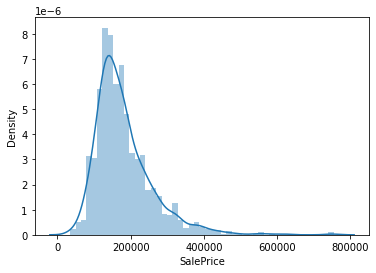

In [26]:
# Label이 어떤 분포를 갖고 있는지 histogram으로 출력
sns.distplot(df_train['SalePrice'])

## Label과 feature들간 상관관계 파악하기

#### (1) numeric

numeric한 feature 중에서 GrLivArea를 description에서 찾아보니 아래와 같이 나온다.<br>
GrLivArea: Above grade (ground) living area square feet (지상의 거실 같은 공간의 넓이)<br><br>

**GrLivArea feature와 SalePrice와 상관관계**에 대해 알아보기 

In [27]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

In [28]:
data

SalePrice  GrLivArea
0        208500       1710
1        181500       1262
2        223500       1786
3        140000       1717
4        250000       2198
...         ...        ...
1455     175000       1647
1456     210000       2073
1457     266500       2340
1458     142125       1078
1459     147500       1256

[1460 rows x 2 columns]

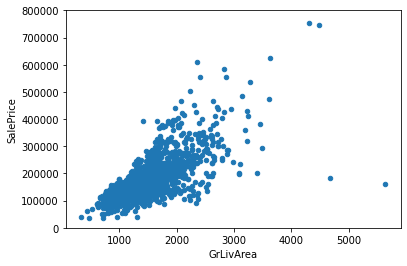

In [29]:
# SalePrice와 GrLivArea의 상관관계 분포
# 전반적으로 비례관계에 있는 것을 확인할 수 있다.
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

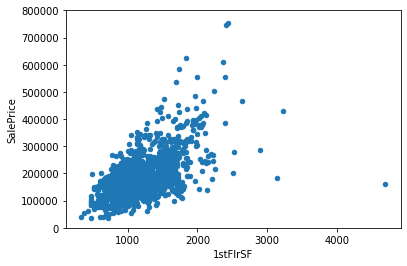

In [30]:
# 1층의 넓이와 SalePrice의 상관관계
# 대략적인 비례관계를 보여준다.
var = '1stFlrSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

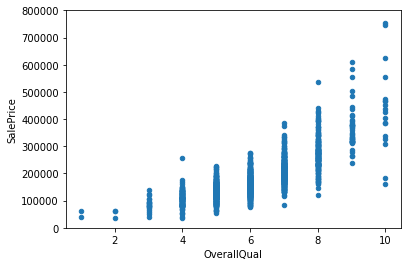

In [31]:
# 전반적인 퀄리티
# 퀄리티가 높을수록 집값이 높게 분포하고 있다.
# 어느 정도 비례관계를 갖는다.

var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

#### (2) categorical

In [32]:
# categorical feature 중 Neighborhood와 SalePrice의 상관관계
var = 'Neighborhood'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

In [33]:
data

SalePrice Neighborhood
0        208500      CollgCr
1        181500      Veenker
2        223500      CollgCr
3        140000      Crawfor
4        250000      NoRidge
...         ...          ...
1455     175000      Gilbert
1456     210000       NWAmes
1457     266500      Crawfor
1458     142125        NAmes
1459     147500      Edwards

[1460 rows x 2 columns]

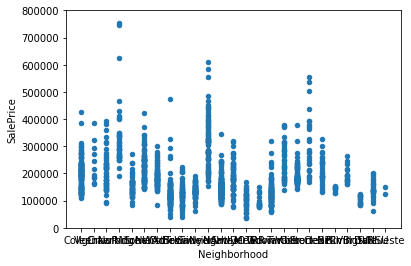

In [34]:
# Neighborhood마다 집값의 범위가 결정이 된다.
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

In [36]:
var = 'Neighborhood'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

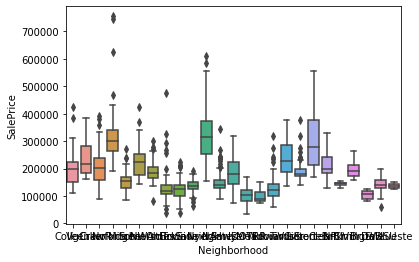

In [37]:
# Seaborn에서는 좀 더 상세하게 plot을 그려준다.
sns.boxplot(x=var, y='SalePrice', data=data)

가운데 박스는 median값이고, 이 박스 안에 있는 부분이 신뢰할만한 데이터 포인트라고 표현한 것이다.<br>
박스의 높이가 결정되는 방법은 IQR이라는 것으로 정의가 된다.<br>
IQR은 하위 25%와 상위 25% 간의 거리를 IQR이라고 한다.<br>
seaborn에서 그림을 그리는 box는 1.5*IQR를 한 것이 박스의 윗점이고, -1.5*IQR를 한 것이 박스의 아랫점이다.<br>
범위를 벗어나 찍혀있는 점들은 outlier이다.<br><br>
boxplot을 자주 사용하면 보기 편할 것이다.

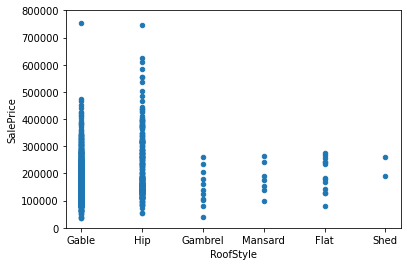

In [35]:
# 이런 feature는 카테고리마다 큰 차이가 없어서 정보력에 있어서는 좋은 feature가 아니다.
var = 'RoofStyle'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

## 전체적으로 파악하려면 어떻게?

In [38]:
# 특정 feature와 SalePrice의 상관관계는 correlation으로 표현할 수 있다.
# correlation이 높으면 높을수록 굉장히 linear한 비례관계가 있다고 볼 수 있다.

df_train['GrLivArea'].corr(df_train['SalePrice'])

0.7086244776126523

In [39]:
# 더 쉬운 방법은 데이터 전체를 correlation해주는 것이다.
# corr() 메소드를 사용하면 모든 feature들의 correlation 값을 전부 계산해준다.
corrmat = df_train.corr()

In [40]:
# matrix를 구하는 것은 기본적으로 text인 것들은 column을 다 제외하게 되어있다.
# 그래서 numeric한 column들만 남아있게 된다.
corrmat

Id  MSSubClass  LotFrontage  ...    MoSold    YrSold  SalePrice
Id             1.000000    0.011156    -0.010601  ...  0.021172  0.000712  -0.021917
MSSubClass     0.011156    1.000000    -0.386347  ... -0.013585 -0.021407  -0.084284
LotFrontage   -0.010601   -0.386347     1.000000  ...  0.011200  0.007450   0.351799
LotArea       -0.033226   -0.139781     0.426095  ...  0.001205 -0.014261   0.263843
OverallQual   -0.028365    0.032628     0.251646  ...  0.070815 -0.027347   0.790982
OverallCond    0.012609   -0.059316    -0.059213  ... -0.003511  0.043950  -0.077856
YearBuilt     -0.012713    0.027850     0.123349  ...  0.012398 -0.013618   0.522897
YearRemodAdd  -0.021998    0.040581     0.088866  ...  0.021490  0.035743   0.507101
MasVnrArea    -0.050298    0.022936     0.193458  ... -0.005965 -0.008201   0.477493
BsmtFinSF1    -0.005024   -0.069836     0.233633  ... -0.015727  0.014359   0.386420
BsmtFinSF2    -0.005968   -0.065649     0.049900  ... -0.015211  0.031706  -0.011378
BsmtUnfSF     -0.007940   -0.140759     0.132644  ...  0.034888 -0.041258   0.214479
TotalBsmtSF   -0.015415   -0.238518     0.392075  ...  0.013196 -0.014969   0.613581
1stFlrSF       0.010496   -0.251758     0.457181  ...  0.031372 -0.013604   0.605852
2ndFlrSF       0.005590    0.307886     0.080177  ...  0.035164 -0.028700   0.319334
LowQualFinSF  -0.044230    0.046474     0.038469  ... -0.022174 -0.028921  -0.025606
GrLivArea      0.008273    0.074853     0.402797  ...  0.050240 -0.036526   0.708624
BsmtFullBath   0.002289    0.003491     0.100949  ... -0.025361  0.067049   0.227122
BsmtHalfBath  -0.020155   -0.002333    -0.007234  ...  0.032873 -0.046524  -0.016844
FullBath       0.005587    0.131608     0.198769  ...  0.055872 -0.019669   0.560664
HalfBath       0.006784    0.177354     0.053532  ... -0.009050 -0.010269   0.284108
BedroomAbvGr   0.037719   -0.023438     0.263170  ...  0.046544 -0.036014   0.168213
KitchenAbvGr   0.002951    0.281721    -0.006069  ...  0.026589  0.031687  -0.135907
TotRmsAbvGrd   0.027239    0.040380     0.352096  ...  0.036907 -0.034516   0.533723
Fireplaces    -0.019772   -0.045569     0.266639  ...  0.046357 -0.024096   0.466929
GarageYrBlt    0.000072    0.085072     0.070250  ...  0.005337 -0.001014   0.486362
GarageCars     0.016570   -0.040110     0.285691  ...  0.040522 -0.039117   0.640409
GarageArea     0.017634   -0.098672     0.344997  ...  0.027974 -0.027378   0.623431
WoodDeckSF    -0.029643   -0.012579     0.088521  ...  0.021011  0.022270   0.324413
OpenPorchSF   -0.000477   -0.006100     0.151972  ...  0.071255 -0.057619   0.315856
EnclosedPorch  0.002889   -0.012037     0.010700  ... -0.028887 -0.009916  -0.128578
3SsnPorch     -0.046635   -0.043825     0.070029  ...  0.029474  0.018645   0.044584
ScreenPorch    0.001330   -0.026030     0.041383  ...  0.023217  0.010694   0.111447
PoolArea       0.057044    0.008283     0.206167  ... -0.033737 -0.059689   0.092404
MiscVal       -0.006242   -0.007683     0.003368  ... -0.006495  0.004906  -0.021190
MoSold         0.021172   -0.013585     0.011200  ...  1.000000 -0.145721   0.046432
YrSold         0.000712   -0.021407     0.007450  ... -0.145721  1.000000  -0.028923
SalePrice     -0.021917   -0.084284     0.351799  ...  0.046432 -0.028923   1.000000

[38 rows x 38 columns]

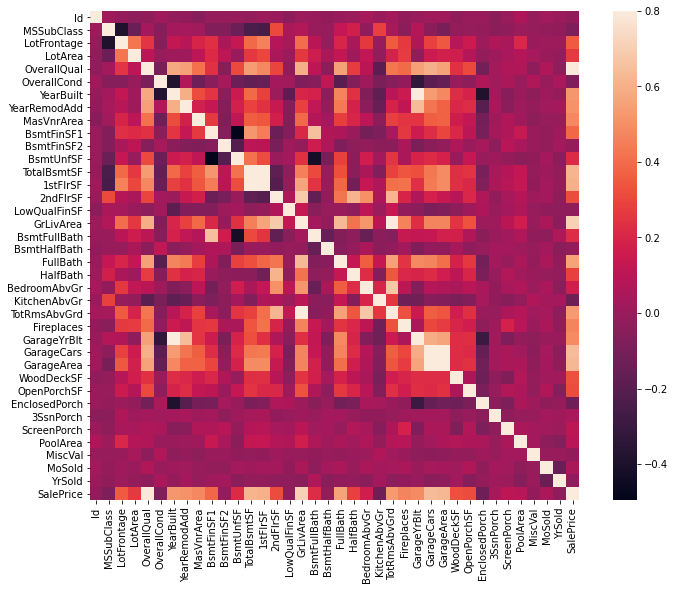

In [42]:
# corrmat은 숫자로만 되어있어서 보기 어려우니
# 시각화를 해주기 위해 seaborn의 heatmap을 사용한다.
# heatmap을 사용하면 모든 column들 간의 상관관계를 확인할 수 있다.
# 색이 연하면 연할수록 상관관계가 강하다.

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [41]:
# SalePrice와 다른 feature들의 상관관계
corrmat['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [43]:
# 상관관계가 낮은 순서대로 정렬
# 상관관계가 높은 feature들을 가지고 학습시키면 신뢰도가 높은 모델을 만들 수 있을 것이라 생각됨.
corrmat.sort_values(by=['SalePrice'])['SalePrice']

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

앞에서는 categorical feature들이 제거되어 상관관계를 확인하지 못했다..<br>
categorical feature들도 점수화를 할 수 있다.<br>
ex) ExterQual

In [44]:
# Ex: Excellent
# Gd: Good
# TA: Average/Typical
# Fa: Fair
# Po: Poor
# categorical한 feature를 1, 2, 3, 4, 5와 같은 숫자로 바꿨으면 상관관계를 확인할 수 있을 것이다.

df_train['ExterQual']

0       Gd
1       TA
2       Gd
3       TA
4       Gd
        ..
1455    TA
1456    TA
1457    Ex
1458    TA
1459    Gd
Name: ExterQual, Length: 1460, dtype: object

다음 시간에 categorical data의 전처리를 해볼 것이다.

## TODO(다음 시간에 할 일)
데이터 전처리
1. Categorical data
2. Missing data
3. Change distribution of the label